### Import dataset

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

In [2]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
# By this way we dont need to remember the data 
import os

# Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in  os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} dictories and {len(filenames)} images in {dirpath}')

There are 2 dictories and 1 images in pizza_steak
There are 2 dictories and 1 images in pizza_steak\test
There are 0 dictories and 250 images in pizza_steak\test\pizza
There are 0 dictories and 250 images in pizza_steak\test\steak
There are 2 dictories and 1 images in pizza_steak\train
There are 0 dictories and 750 images in pizza_steak\train\pizza
There are 0 dictories and 750 images in pizza_steak\train\steak


In [4]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
#     Set target directory to view images from here
    target_folder = target_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder) , 1)
    
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');
    
    print(f'Image shape: {img.shape}')
    
    return img

Image shape: (512, 512, 3)


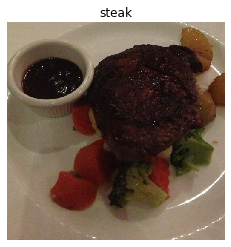

In [6]:
img = view_random_image('pizza_steak/train/' , 'steak')

In [7]:
img

array([[[134, 119,  96],
        [135, 120,  97],
        [143, 128, 105],
        ...,
        [167, 152, 133],
        [170, 155, 136],
        [174, 159, 140]],

       [[144, 129, 106],
        [158, 143, 120],
        [176, 161, 138],
        ...,
        [170, 155, 136],
        [170, 155, 136],
        [170, 155, 136]],

       [[186, 172, 146],
        [183, 168, 145],
        [182, 167, 144],
        ...,
        [173, 158, 139],
        [171, 156, 137],
        [165, 150, 131]],

       ...,

       [[155, 129, 112],
        [156, 130, 113],
        [158, 132, 115],
        ...,
        [150, 133, 115],
        [151, 134, 116],
        [154, 137, 119]],

       [[161, 135, 118],
        [158, 132, 115],
        [158, 132, 115],
        ...,
        [151, 134, 116],
        [153, 136, 118],
        [153, 136, 118]],

       [[158, 132, 115],
        [153, 127, 110],
        [152, 126, 109],
        ...,
        [153, 136, 118],
        [156, 139, 121],
        [155, 138, 120]]

In [8]:
img.shape

(512, 512, 3)

In [9]:
# Shape of image is in form (width , height , color channels)
# Now, we know that pixel value lie between 0 to 255
# So, first we need to normalize it
img/255

array([[[0.5254902 , 0.46666667, 0.37647059],
        [0.52941176, 0.47058824, 0.38039216],
        [0.56078431, 0.50196078, 0.41176471],
        ...,
        [0.65490196, 0.59607843, 0.52156863],
        [0.66666667, 0.60784314, 0.53333333],
        [0.68235294, 0.62352941, 0.54901961]],

       [[0.56470588, 0.50588235, 0.41568627],
        [0.61960784, 0.56078431, 0.47058824],
        [0.69019608, 0.63137255, 0.54117647],
        ...,
        [0.66666667, 0.60784314, 0.53333333],
        [0.66666667, 0.60784314, 0.53333333],
        [0.66666667, 0.60784314, 0.53333333]],

       [[0.72941176, 0.6745098 , 0.57254902],
        [0.71764706, 0.65882353, 0.56862745],
        [0.71372549, 0.65490196, 0.56470588],
        ...,
        [0.67843137, 0.61960784, 0.54509804],
        [0.67058824, 0.61176471, 0.5372549 ],
        [0.64705882, 0.58823529, 0.51372549]],

       ...,

       [[0.60784314, 0.50588235, 0.43921569],
        [0.61176471, 0.50980392, 0.44313725],
        [0.61960784, 0

Reading the [original dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf) authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

### Model - 1 (Using CNN)

In [10]:
# This is just a example code.
# This is how code looks like when we finish our code
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 48s 995ms/step - loss: 0.5772 - accuracy: 0.6967 - val_loss: 0.3850 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 44s 935ms/step - loss: 0.4327 - accuracy: 0.8153 - val_loss: 0.3504 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 44s 928ms/step - loss: 0.4077 - accuracy: 0.8227 - val_loss: 0.3681 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 42s 891ms/step - loss: 0.3749 - accuracy: 0.8400 - val_loss: 0.3393 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 42s 890ms/step - loss: 0.3252 - accuracy: 0.8720 - val_loss: 0.3052 - val_accuracy: 0.8560


Why do we need convolution neural network.
[To understand this see this video](https://www.youtube.com/watch?v=x_VrgWTKkiM)

To see what happens in between CNN network. We can use [CNN Explainer Website](https://poloclub.github.io/cnn-explainer/)

In first model, we can see that accuracy is 87% which is good compared to our base model(with 50.76% accuracy)

In [11]:
# Let's check architecture of our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [12]:
# Check shapes of training data
len(train_data)

47

### Model - 2 (Start from scrap)

In [13]:
# Now, let's make model by our method
# First, we will implement the same code as we have written in binary classification here
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224 , 224 , 3)) , 
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy' ,
               optimizer = 'adam' , 
               metrics = ['accuracy'])

history_2 = model_2.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) , 
                       validation_data = valid_data , validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 155ms/step - loss: 1.1288 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 152ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 152ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 152ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 151ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [14]:
# Here, we can see that our model accuracy is just like gueesing
# Anyways, let's see the architecture of model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Here, we can see number of parameters are too large.

### Model - 3 (Add Nodes in hidden layers)

In [15]:
# Let's try to add more nodes in each layer maybe that can improve our accuracy
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224 , 224 , 3)) ,
    tf.keras.layers.Dense(100 , activation = 'relu') ,
    tf.keras.layers.Dense(100 , activation = 'relu') , 
    tf.keras.layers.Dense(100 , activation = 'relu') ,
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

model_3.compile(loss = 'binary_crossentropy' ,
               optimizer = 'Adam' ,
               metrics = ['accuracy'])

model_3.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) , 
           validation_data = valid_data , validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 3.9299 - accuracy: 0.5920 - val_loss: 0.5475 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6280 - accuracy: 0.7227 - val_loss: 0.4456 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.6703 - accuracy: 0.7107 - val_loss: 0.8292 - val_accuracy: 0.6880
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.5813 - accuracy: 0.7427 - val_loss: 0.4647 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4897 - accuracy: 0.7840 - val_loss: 0.7845 - val_accuracy: 0.5720


In [16]:
# Here, we can see we have definately increasd our accuracy
# Let's see summary of model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Although number of params is large we can't be able to make a model that can outperform our model_1

We just went through a whirlwind of steps:

    1. Become one with the data (visualize, visualize, visualize...)
    2. Preprocess the data (prepare it for a model)
    3. Create a model (start with a baseline)
    4. Fit the model
    5. Evaluate the model
    6. Adjust different parameters and improve model (try to beat your baseline)
    7. Repeat until satisfied
Let's step through each.

## 1. Visualize random image of given data

Image shape: (384, 512, 3)
Image shape: (384, 512, 3)


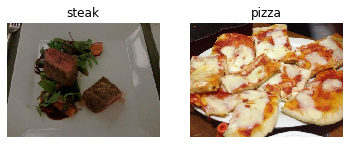

In [17]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data(to prepare it for model)

Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.
Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20).

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

In [18]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [19]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# This just stores object that will rescale image into noramalized data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [20]:
# Turn it into batches using objects returned from imagedatagenrator objects
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Here, we can see train data has 1500 images. so, after converting data into normalised batches 

size(train_data) = (int)(train_size/batch_size) + 1(if needed) = (int)(1500/32) + 1 = (int)(46.875) + 1 = 46 + 1 = 47

Add 1 if and only if train_size is not perfect divisor of batch_size.

In [21]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [22]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [23]:
# Here, we can see our data has been normalized
# Let's see what happend to labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Due to the class_mode parameter being 'binary' our labels are either 0 (pizza) or 1 (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.

## 3. Create a model (start with a baseline)

### Model - 4 (Model using CNN)

In [24]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [25]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical structure of:

```
# Basic structure of CNN
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - these are the number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'` (default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

What's a "feature"?

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by us, instead, the model learns them as it applies different filters across the image.

> 📖 **Resources:** For a great demonstration of these in action, be sure to spend some time going through the following:
  * [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - a great visual overview of many of the concepts we're replicating here with code.
  * [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
  * For a great explanation of padding, see this [Stack Overflow answer](https://stackoverflow.com/a/39371113/7900723).

Now our model is ready, let's compile it.

In [26]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

## 4. Fit the model

In [27]:
print(len(train_data) , len(test_data))

47 16


In [28]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 52s 1s/step - loss: 1.7139 - accuracy: 0.6380 - val_loss: 0.4594 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 51s 1s/step - loss: 0.4348 - accuracy: 0.8127 - val_loss: 0.4833 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 52s 1s/step - loss: 0.3493 - accuracy: 0.8573 - val_loss: 0.3541 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 54s 1s/step - loss: 0.2402 - accuracy: 0.9107 - val_loss: 0.4294 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 53s 1s/step - loss: 0.1330 - accuracy: 0.9560 - val_loss: 0.4242 - val_accuracy: 0.8360


## 5. Evaluate model

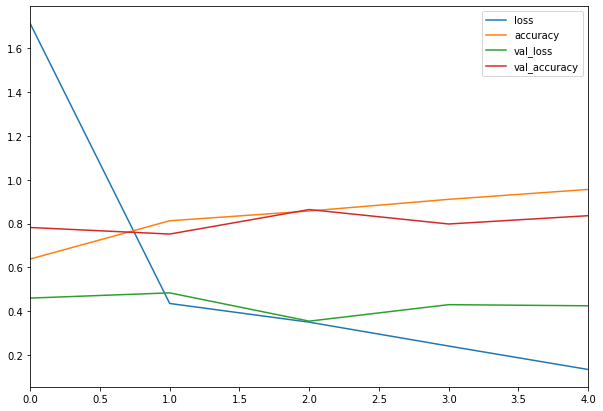

In [29]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10 , 7));

In [30]:
def plot_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs , loss , label = 'training loss')
    plt.plot(epochs , val_loss , label = 'validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs , accuracy , label = 'training accuracy')
    plt.plot(epochs , val_accuracy , label = 'validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

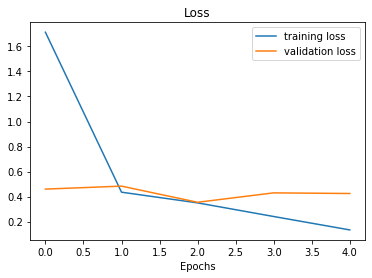

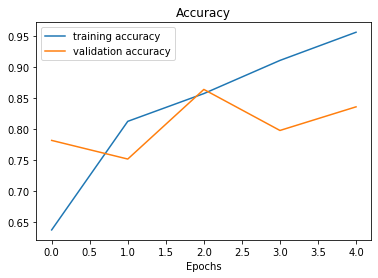

In [31]:
plot_curves(history_4)

In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 6. Adjust the model parameters

Fitting a machine learning model  comes in 3 steps:
0. Create a basline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:
* A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* A ConvNet with max pooling and data augmentation

For the first model, we'll follow the structure:

```
# Basic structure of CNN with max pooling
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

Let's built it. It'll have the same structure as `model_4` but with a [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer after each convolutional layer.

### Model - 5 (Add Pooling layers in between)

In [36]:
# Pooling size = 2, converts data into half size
model_5 = tf.keras.Sequential([
    Conv2D(filters = 10 , kernel_size = 3 , activation = 'relu' , input_shape = (224 , 224 , 3)) ,
    MaxPool2D(pool_size = 2) ,
    Conv2D(filters = 10 , kernel_size = 3 , activation = 'relu') ,
    MaxPool2D(pool_size = 2) ,
    Conv2D(filters = 10 , kernel_size = 3 , activation = 'relu') ,
    MaxPool2D(pool_size = 2) ,
    Flatten() ,
    Dense(1 , activation = 'sigmoid')
])

model_5.compile(loss = 'binary_crossentropy' , 
               optimizer = Adam() , 
               metrics = ['accuracy'])

history_5 = model_5.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) ,
           validation_data = test_data , validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 434ms/step - loss: 0.6047 - accuracy: 0.7087 - val_loss: 0.4637 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 20s 419ms/step - loss: 0.4288 - accuracy: 0.8080 - val_loss: 0.3571 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 19s 404ms/step - loss: 0.3969 - accuracy: 0.8247 - val_loss: 0.3410 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 20s 432ms/step - loss: 0.3718 - accuracy: 0.8373 - val_loss: 0.3211 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 20s 433ms/step - loss: 0.3445 - accuracy: 0.8520 - val_loss: 0.3881 - val_accuracy: 0.8260


In [37]:
# Here, we can see that our model is performin poor on train data compared to test data
# This means we have resolved issue of overfitting
# If we compare number of parameters to previos model than we can see that it has been reduced bcz of pooling layer 
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)             

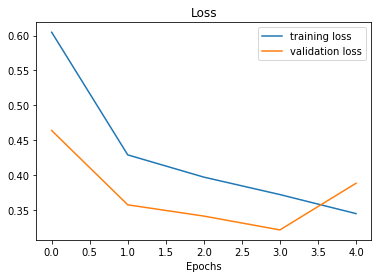

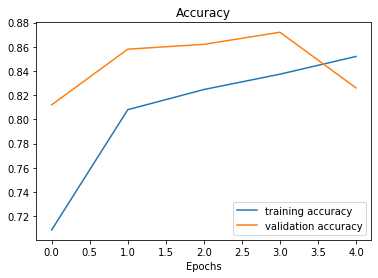

In [38]:
plot_curves(history_5)

Here, although accuracy of training and validation model has come together at the end accuracy started to decrease which means model is still overfitted.

We will use data augmentation, [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instances.

### Model - 6 (Data augmentation)

In [42]:
# Augmenting Image
train_datagen_augmented = ImageDataGenerator(rescale = 1/255. , 
                                            rotation_range = 0.2 , #rotate image slightly
                                            shear_range = 0.2 , #shear the image
                                            zoom_range = 0.2 , #zoominto image
                                            width_shift_range = 0.2 , #shift image width ways
                                            height_shift_range = 0.2 , #shift image width ways
                                            horizontal_flip = True) #flip image by horizontal axis

# Non-augmenting image
train_datagen = ImageDataGenerator(rescale = 1/255.)

test_datagen = ImageDataGenerator(rescale = 1/255.)

In [44]:
# Don't shuffle images for demontration
print('Augmented Training Images: ')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir , target_size = (224 , 224) , batch_size = 32 ,
                                              class_mode = 'binary' , shuffle = False)

print('Non-Augmented Training Images: ')
train_data = train_datagen.flow_from_directory(train_dir , target_size = (224 , 224) , batch_size = 32  ,
                                               class_mode = 'binary' , shuffle = False)

print('Unchanged Test Images: ')
test_data = test_datagen.flow_from_directory(test_dir , target_size = (224 , 224) , batch_size = 32 , 
                                            class_mode = 'binary' , shuffle = False)

Augmented Training Images: 
Found 1500 images belonging to 2 classes.
Non-Augmented Training Images: 
Found 1500 images belonging to 2 classes.
Unchanged Test Images: 
Found 500 images belonging to 2 classes.


In [45]:
# Get data batch samples
images , labels = train_data.next()
augmented_images , augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

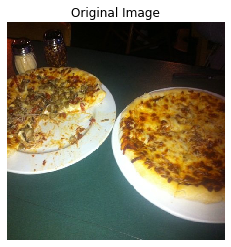

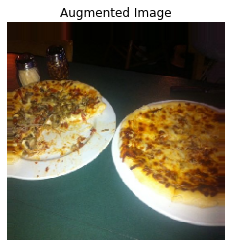

In [48]:
random_number = random.randint(0 , 32) # first get random batch number between 0 to 32
plt.imshow(images[random_number])
plt.title(f'Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented Image')
plt.axis(False)

In [50]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size = 2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size = 2),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 37s 765ms/step - loss: 0.7141 - accuracy: 0.4287 - val_loss: 0.6925 - val_accuracy: 0.5280
Epoch 2/5
47/47 [==============================] - 29s 616ms/step - loss: 0.6949 - accuracy: 0.5273 - val_loss: 0.6892 - val_accuracy: 0.5220
Epoch 3/5
47/47 [==============================] - 32s 685ms/step - loss: 0.6982 - accuracy: 0.5280 - val_loss: 0.6783 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 31s 664ms/step - loss: 0.7092 - accuracy: 0.4667 - val_loss: 0.6927 - val_accuracy: 0.5220
Epoch 5/5
47/47 [==============================] - 31s 657ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6916 - val_accuracy: 0.5940


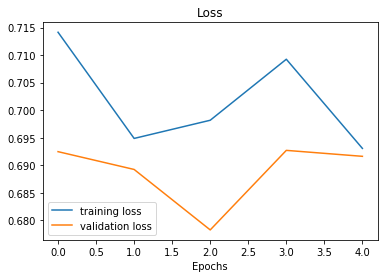

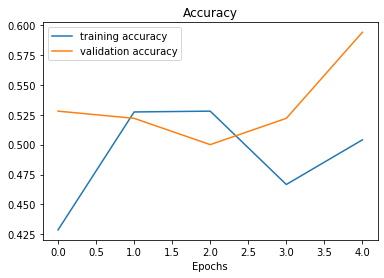

In [51]:
# Here, our model is not performing well because it is seeing first pizza entries then other class
# because we have assigned shuffle value as False
# But we can see accuracy and loss are near
plot_curves(history_6)

### Model - 7 (Data augmentation + Shuffle)

In [52]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir , target_size = (224 , 224) ,
                                                                           batch_size = 32 , class_mode = 'binary' ,
                                                                           shuffle = True)

Found 1500 images belonging to 2 classes.


In [57]:
model_7 = Sequential([
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)) , 
    MaxPool2D() ,
    Conv2D(10 , 3 , activation = 'relu') , 
    MaxPool2D() ,
    Conv2D(10 , 3 , activation = 'relu') ,
    MaxPool2D() ,
    Flatten() ,
    Dense(1 , activation = 'sigmoid')
])

model_7.compile(loss = 'binary_crossentropy' , optimizer = Adam() , metrics = ['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled , epochs = 5 ,
                       steps_per_epoch = len(train_data_augmented_shuffled) , validation_data = test_data , 
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 32s 659ms/step - loss: 0.6447 - accuracy: 0.6220 - val_loss: 0.5940 - val_accuracy: 0.6500
Epoch 2/5
47/47 [==============================] - 30s 627ms/step - loss: 0.5802 - accuracy: 0.7073 - val_loss: 0.4809 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 31s 654ms/step - loss: 0.4880 - accuracy: 0.7713 - val_loss: 0.4117 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 31s 655ms/step - loss: 0.4742 - accuracy: 0.7707 - val_loss: 0.3361 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 31s 653ms/step - loss: 0.4565 - accuracy: 0.7967 - val_loss: 0.3361 - val_accuracy: 0.8700


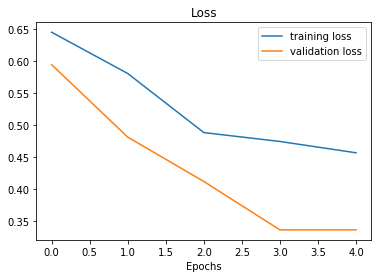

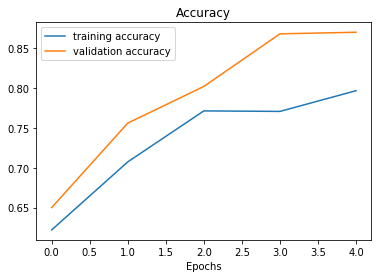

In [59]:
# By this curves we can see that training data is not overfitted
# Coz accuracy of training data is less than test data
plot_curves(history_7)

### Model - 8 (Add Convolution layer between pooling layers)

In [61]:
model_8 = Sequential([
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)) , 
    Conv2D(10 , 3 , activation = 'relu') , 
    MaxPool2D() , 
    Conv2D(10 , 3 , activation = 'relu') ,
    Conv2D(10 , 3 , activation = 'relu') ,
    MaxPool2D() , 
    Flatten() ,
    Dense(1 , activation = 'sigmoid')
])

model_8.compile(loss = 'binary_crossentropy' , optimizer = Adam() , metrics = ['accuracy'])

history_8 = model_8.fit(train_data_augmented_shuffled , epochs = 5 , 
                       steps_per_epoch = len(train_data_augmented_shuffled) , validation_data = test_data ,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 46s 963ms/step - loss: 0.6137 - accuracy: 0.6480 - val_loss: 0.4361 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 46s 979ms/step - loss: 0.5264 - accuracy: 0.7440 - val_loss: 0.4635 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 45s 959ms/step - loss: 0.5068 - accuracy: 0.7560 - val_loss: 0.4527 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 45s 954ms/step - loss: 0.4915 - accuracy: 0.7680 - val_loss: 0.3452 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 45s 955ms/step - loss: 0.4798 - accuracy: 0.7880 - val_loss: 0.3937 - val_accuracy: 0.8380


In [62]:
# This model is same as model_1
# Let's check it out
model_8.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 28090)           

In [63]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

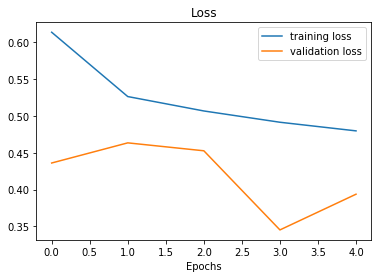

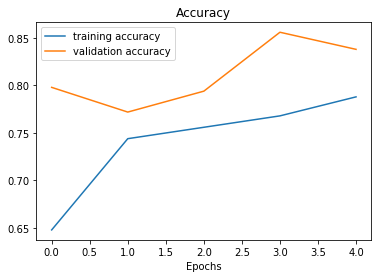

In [64]:
plot_curves(history_8)

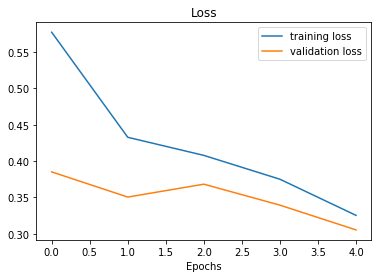

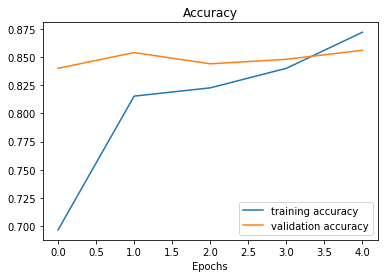

In [65]:
plot_curves(history_1)

# Multiclass Classification

In [68]:
import zipfile

# This wget command is not working in this notebook so instead of writing code like this use that link to download
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [74]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [75]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [76]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [77]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


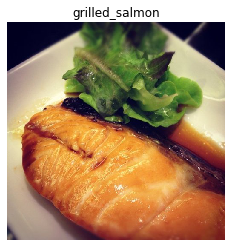

In [78]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

### Model - 9 (Normalisation on multiclass)

In [79]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Changed class mode to categorical
train_data = train_datagen.flow_from_directory(train_dir , target_size = (224 , 224) , 
                                              batch_size = 32 , class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir , target_size = (224 , 224) , 
                                            batch_size = 32 , class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [87]:
# Creatin model to give us baseline
model_9 = Sequential([
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)) ,
    Conv2D(10 , 3 , activation = 'relu') , 
    MaxPool2D() ,
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)) , 
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)) ,
    MaxPool2D() ,
    Flatten() ,
    Dense(10 , activation = 'softmax')
])

model_9.compile(loss = 'categorical_crossentropy' , optimizer = Adam() , metrics = ['accuracy'])

In [88]:
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data ,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 230s 978ms/step - loss: 2.1536 - accuracy: 0.2083 - val_loss: 2.0729 - val_accuracy: 0.2356
Epoch 2/5
235/235 [==============================] - 213s 904ms/step - loss: 1.9749 - accuracy: 0.2979 - val_loss: 1.9323 - val_accuracy: 0.3276
Epoch 3/5
235/235 [==============================] - 214s 909ms/step - loss: 1.7370 - accuracy: 0.4045 - val_loss: 1.8798 - val_accuracy: 0.3440
Epoch 4/5
235/235 [==============================] - 216s 920ms/step - loss: 1.2073 - accuracy: 0.6045 - val_loss: 2.2049 - val_accuracy: 0.3116
Epoch 5/5
235/235 [==============================] - 215s 915ms/step - loss: 0.5785 - accuracy: 0.8188 - val_loss: 2.9356 - val_accuracy: 0.2848


In [89]:
model_9.evaluate(test_data)

79/79 [==============================] - 19s 241ms/step - loss: 2.9356 - accuracy: 0.2848


[2.9355907440185547, 0.2847999930381775]

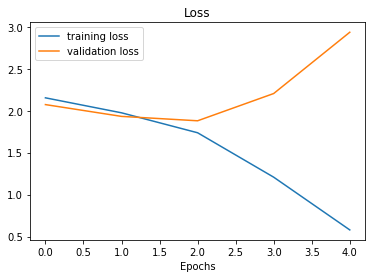

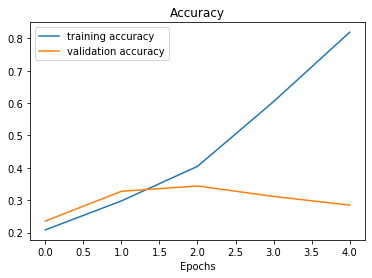

In [90]:
# Here, we can see that there is a huge differece between training and testing accuracy
# This means out model is overfitting the data
plot_curves(history_9)

To avoid overfitting, we can do these processes:
* **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
* **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
* **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

> 🔑 Note: Preventing overfitting is also referred to as **regularization**.

### Model - 10 (Reduce number of layers)

In [91]:
# try to simplify model
model_10 = tf.keras.Sequential([
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)) ,
    MaxPool2D() ,
    Conv2D(10 , 3 , activation = 'relu' , input_shape = (224 , 224 , 3)) ,
    MaxPool2D() ,
    Flatten() ,
    Dense(10 , activation = 'softmax')
])

model_10.compile(loss = 'categorical_crossentropy' ,
                optimizer = Adam() ,
                metrics = ['accuracy'])

history_10 = model_10.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) , 
                         validation_data = test_data , validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 92s 391ms/step - loss: 2.2853 - accuracy: 0.2171 - val_loss: 2.0020 - val_accuracy: 0.2856
Epoch 2/5
235/235 [==============================] - 94s 400ms/step - loss: 1.7812 - accuracy: 0.3892 - val_loss: 1.9434 - val_accuracy: 0.3152
Epoch 3/5
235/235 [==============================] - 95s 405ms/step - loss: 1.4402 - accuracy: 0.5295 - val_loss: 2.0787 - val_accuracy: 0.2956
Epoch 4/5
235/235 [==============================] - 96s 407ms/step - loss: 1.0430 - accuracy: 0.6699 - val_loss: 2.3179 - val_accuracy: 0.2900
Epoch 5/5
235/235 [==============================] - 96s 409ms/step - loss: 0.6632 - accuracy: 0.7983 - val_loss: 2.6877 - val_accuracy: 0.2708


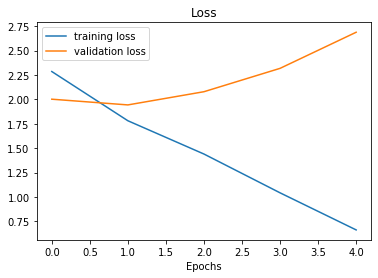

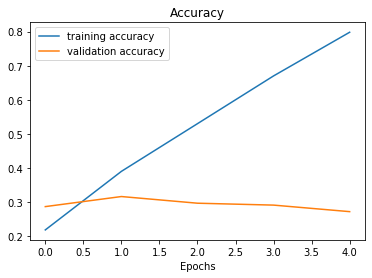

In [92]:
# Still data is overfitted, that mean we need to augment it
# Data augmentation makes hard for model to learn => No overfitting
plot_curves(history_10)

### Model - 11 (Data augmentation & clone Model - 10)

In [96]:
train_data_augmentedgen = ImageDataGenerator(rescale = 1/255. , rotation_range = 0.2 , width_shift_range = 0.2 ,
                                         height_shift_range = 0.2 , zoom_range = 0.2 , horizontal_flip = True)

train_data_augmented = train_data_augmentedgen.flow_from_directory(train_dir , target_size = (224 , 224) , 
                                                                  batch_size = 32 , class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [97]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss = 'categorical_crossentropy' , optimizer = Adam() , metrics = ['accuracy'])

history_11 = model_11.fit(train_data_augmented , epochs = 5 , steps_per_epoch = len(train_data_augmented) , 
                         validation_data = test_data , validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 172s 730ms/step - loss: 2.2561 - accuracy: 0.1812 - val_loss: 2.0484 - val_accuracy: 0.2776
Epoch 2/5
235/235 [==============================] - 169s 720ms/step - loss: 2.0750 - accuracy: 0.2573 - val_loss: 1.9278 - val_accuracy: 0.3116
Epoch 3/5
235/235 [==============================] - 171s 725ms/step - loss: 2.0300 - accuracy: 0.2855 - val_loss: 1.8481 - val_accuracy: 0.3616
Epoch 4/5
235/235 [==============================] - 161s 687ms/step - loss: 1.9804 - accuracy: 0.3183 - val_loss: 1.8503 - val_accuracy: 0.3688
Epoch 5/5
235/235 [==============================] - 164s 696ms/step - loss: 1.9485 - accuracy: 0.3273 - val_loss: 1.8111 - val_accuracy: 0.3860


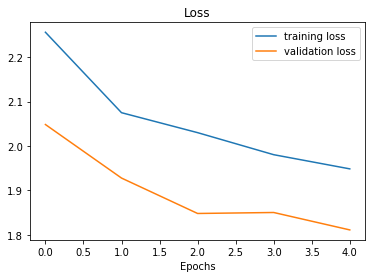

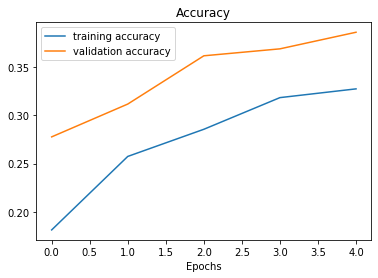

In [98]:
plot_curves(history_11)

In [112]:
# Name of labels
a = class_names
print(a)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


About transfer learning, we'll see it in next notebook